In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import ensembles

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv("train_data.csv", index_col="index")
data.pop("id")
target = pd.read_csv("train_target.csv", index_col="index")

In [4]:
data.columns[data.dtypes != object]

Index(['bedrooms_number', 'batchrooms_number', 'square_footage_home',
       'square_footage_lot', 'floors_number', 'has_waterfront',
       'has_been_viewed', 'condition_quality', 'housing_unity_grade',
       'square_footage_except_basement', 'square_footage_only_basement',
       'build_year', 'renovation_year', 'coordinate_latitude',
       'coordinate_longitude', 'square_footage_home_old',
       'square_footage_lot_old'],
      dtype='object')

In [3]:
data["date"] = pd.to_datetime(data["date"])
data["year"] = data.date.dt.year
data["month"] = data.date.dt.month
data["day"] = data.date.dt.day
data.pop("date")
pass

In [4]:
data.isna().sum()

bedrooms_number                   0
batchrooms_number                 0
square_footage_home               0
square_footage_lot                0
floors_number                     0
has_waterfront                    0
has_been_viewed                   0
condition_quality                 0
housing_unity_grade               0
square_footage_except_basement    0
square_footage_only_basement      0
build_year                        0
renovation_year                   0
coordinate_latitude               0
coordinate_longitude              0
square_footage_home_old           0
square_footage_lot_old            0
year                              0
month                             0
day                               0
dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy().ravel(), test_size=0.3, random_state=42) 

RMSE: 143.5490
52.59865188598633


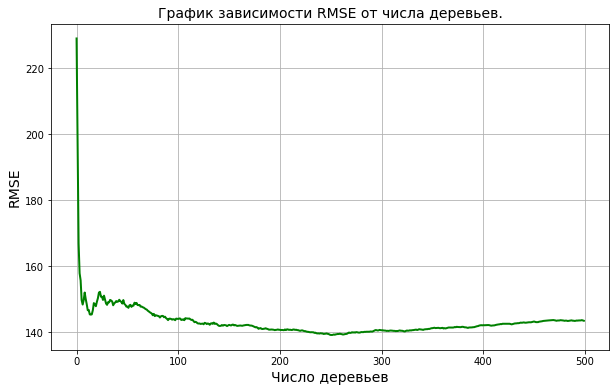

In [6]:
import time
start = time.time()

model = ensembles.RandomForestMSE(n_estimators=500, max_depth=None, feature_subsample_size=0.5)
rmse = model.fit(X_train, y_train, X_test, y_test)
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от числа деревьев.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Число деревьев", fontsize=14)
plt.plot(np.arange(500), rmse, lw=2, c="green")
plt.grid()
print(time.time() - start)
plt.savefig("n_tree_forest.pdf")

29.545843839645386


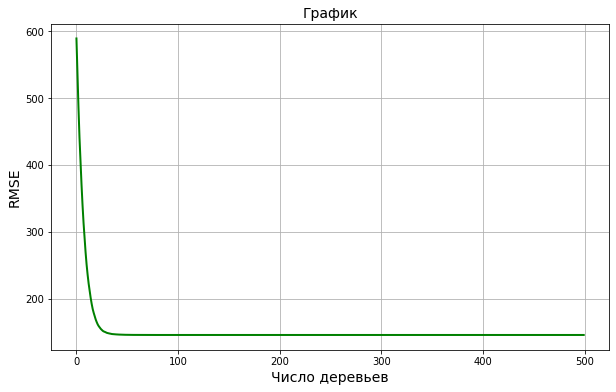

In [7]:
import time
start = time.time()

model = ensembles.GradientBoostingMSE(n_estimators=500, max_depth=None, feature_subsample_size=0.5)
rmse = model.fit(X_train, y_train, X_test, y_test)
    
fig = plt.figure(figsize=(10, 6))
plt.title("График", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Число деревьев", fontsize=14)
plt.plot(np.arange(500), rmse, lw=2, c="green")
plt.grid()
print(time.time() - start)
plt.savefig("n_tree_boosting.pdf")

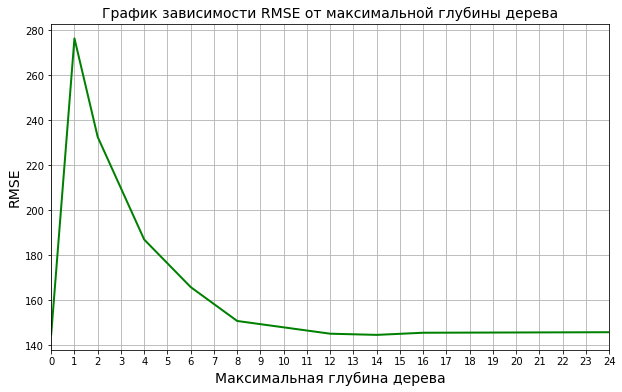

In [8]:
depth = [0, 1, 2, 4, 6, 8, 12, 14,  16, 24]
rmse = []
for i in depth:
    md = i if i > 0 else None
    model = ensembles.RandomForestMSE(n_estimators=200, max_depth=md, feature_subsample_size=0.5)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))

fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от максимальной глубины дерева", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Максимальная глубина дерева", fontsize=14)
plt.xlim([0, 24])
plt.xticks(list(range(0, 25)))
plt.plot(depth, rmse, lw=2, c="green")
plt.grid()
plt.savefig("depth_forest.pdf")

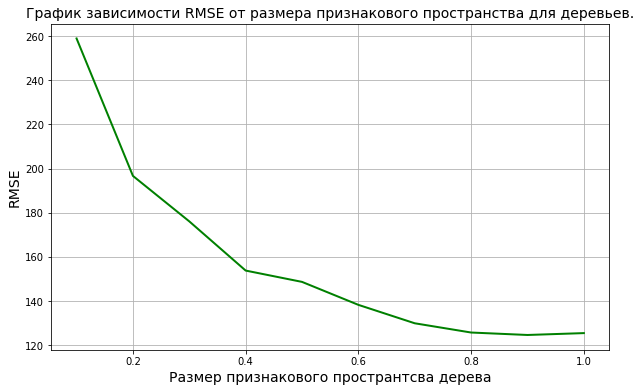

In [9]:
fss = np.arange(0.1, 1.1, 0.1)
rmse = []
for i in fss:
    model = ensembles.RandomForestMSE(n_estimators=200, feature_subsample_size=i)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от размера признакового пространства для деревьев.", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Размер признакового пространтсва дерева", fontsize=14)
plt.plot(fss, rmse, lw=2, c="green")
plt.grid()
plt.savefig("fss_forest.pdf")

[865.65513512 357.76372004 835.44688778 ... 275.83236438 289.34073847
 341.54102765]
[645.81860518 434.41013339 965.67986814 ... 370.26354155 404.77603833
 255.8523828 ]
[798.5902724  364.30245568 952.10463639 ... 341.26362431 324.92363437
 232.60514386]
[816.85066292 368.57963662 927.94581628 ... 293.15726611 330.52489823
 242.87535621]
[832.89946062 370.50123446 987.35466145 ... 321.54997246 328.58700734
 245.11216107]
[ 878.70517914  364.29332902 1001.71897091 ...  299.16081965  307.23042
  250.13458352]
[911.67437609 403.24570566 902.15795975 ... 287.13876964 299.3474028
 222.00820594]
[892.68968257 380.0860629  889.65334522 ... 319.45641072 287.68823741
 263.27525728]
[828.02843208 342.90269523 799.22018566 ... 340.34574458 271.8801035
 265.93778456]
[836.92803353 403.28633313 912.21361379 ... 319.59102973 278.94414202
 298.46042493]


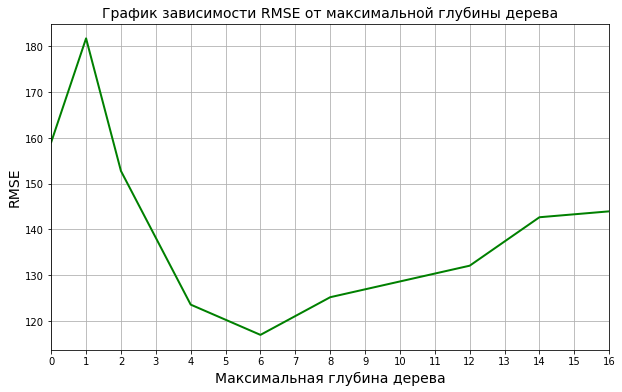

In [10]:
depth =  [0, 1, 2, 4, 6, 8, 12, 14,  16, 24]

rmse = []
for i in depth:
    md = i if i > 0 else None
    model = ensembles.GradientBoostingMSE(n_estimators=100, max_depth=md, feature_subsample_size=0.5)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    print(res)
    rmse.append(np.sqrt(mse(y_test, res)))

fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от максимальной глубины дерева", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Максимальная глубина дерева", fontsize=14)
plt.xlim([0, 16])
plt.xticks(list(range(0, 17)))
plt.plot(depth, rmse, lw=2, c="green")
plt.grid()
plt.savefig("depth_boosting.pdf")

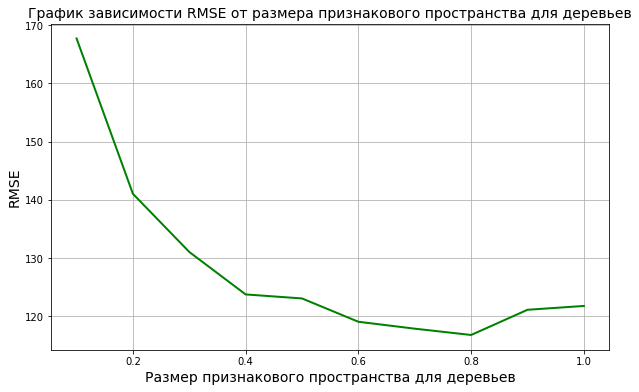

In [11]:
fss = np.arange(0.1, 1.1, 0.1)
rmse = []
for i in fss:
    model = ensembles.GradientBoostingMSE(n_estimators=100, feature_subsample_size=i)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от размера признакового пространства для деревьев", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Размер признакового пространства для деревьев", fontsize=14)
plt.plot(fss, rmse, lw=2, c="green")
plt.grid()
plt.savefig("fss_boosting.pdf")

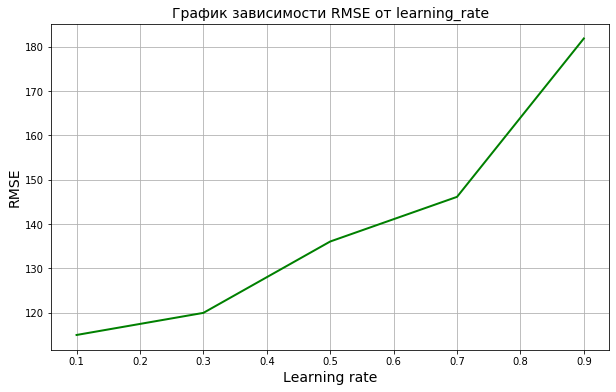

In [12]:
lr = np.arange(0.1, 1.1, 0.2)
rmse = []
for i in lr:
    model = ensembles.GradientBoostingMSE(n_estimators=100, feature_subsample_size=0.5, learning_rate=i)
    model.fit(X_train, y_train)
    res = model.predict(X_test)
    rmse.append(np.sqrt(mse(y_test, res)))
    
fig = plt.figure(figsize=(10, 6))
plt.title("График зависимости RMSE от learning_rate", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Learning rate", fontsize=14)
plt.plot(lr, rmse, lw=2, c="green")
plt.grid()
plt.savefig("lr_boosting.pdf")